In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
!wget https://data.cityofnewyork.us/api/views/tqtj-sjs8/rows.csv?accessType=DOWNLOAD

./test: Is a directory


In [13]:
motor_df = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Person.csv')

In [14]:
motor_df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [15]:
motor_df['PED_LOCATION'].unique()

array([nan, 'Pedestrian/Bicyclist/Other Pedestrian at Intersection',
       'Pedestrian/Bicyclist/Other Pedestrian Not at Intersection',
       'Unknown', 'Does Not Apply'], dtype=object)

In [16]:
missingValue = motor_df.isna().sum().to_frame(name='NaN_number')

In [17]:
missingValue.sort_values('NaN_number',inplace=True,ascending=False)

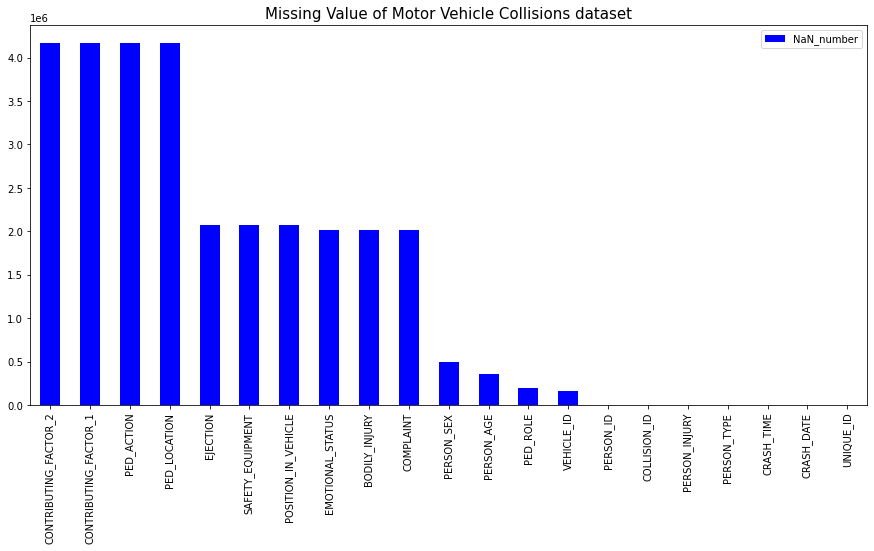

In [18]:
missingValue.plot.bar(color='blue',figsize=(15,7))
plt.title('Missing Value of Motor Vehicle Collisions dataset',fontsize=15)
plt.legend()
plt.show()

In [10]:
crash_df = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Crashes.csv',dtype={'BOROUGH':str,'ZIP CODE':str})

In [11]:
missing_value_crash = crash_df.isna().sum().to_frame(name='NaN_number')
missing_value_crash.sort_values('NaN_number',inplace=True,ascending=False)

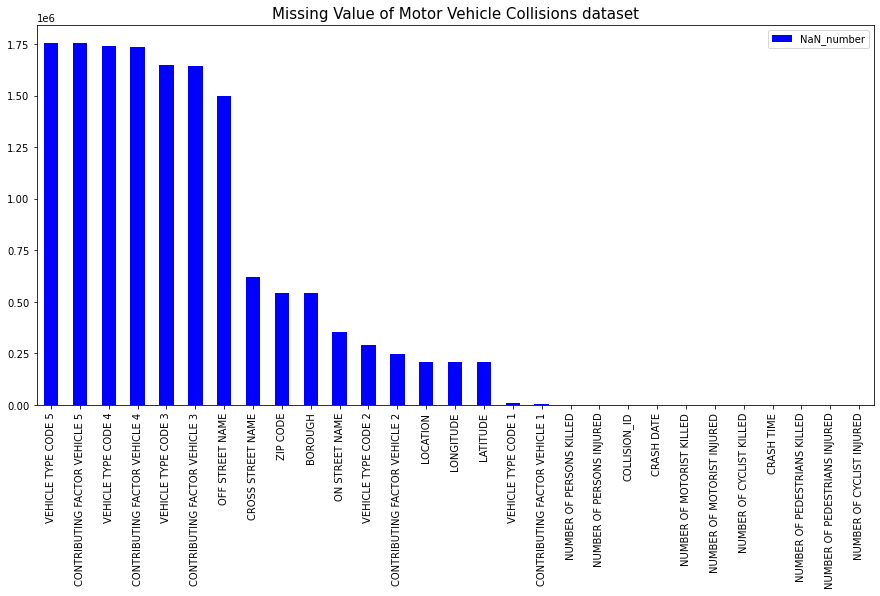

In [12]:
missing_value_crash.plot.bar(color='blue',figsize=(15,7))
plt.title('Missing Value of Motor Vehicle Collisions dataset',fontsize=15)
plt.legend()
plt.show()

In [5]:
permit_df = pd.read_csv('./data/Street_Construction_Permits.csv', low_memory=False)

In [6]:
permit_df.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,...,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn
0,Q012007305130,NaN,NaN,NaN,015,DELINQUENT CUTFORM/COMPACTION,1,STREET OPENING PERMIT,0162,NYC PARKS - RECONSTRUCTION CONTRACT,...,CLOVERDALE BOULEVARD,57 ROAD,59 AVENUE,"FERRANDINO & SON, INC.",MOSY1841,NaN,NaN,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
1,X042012258017,NaN,NaN,NaN,030,EXPIRED,4,SIDEWALK CONSTRUCTION PERMIT,0401,REPAIR SIDEWALK,...,HOLLAND AVENUE,ALLERTON AVENUE,ARNOW AVENUE,KIANI CONTRACTING INC.,NaN,NaN,NaN,CONCRETE,12/14/2013 09:03:08 PM +0000,06/22/2018 08:16:47 PM +0000
2,X012010223030,NaN,NaN,NaN,030,EXPIRED,1,STREET OPENING PERMIT,0122,REPAIR GAS,...,MICKLE AVENUE,ADEE AVENUE,ARNOW AVENUE,CONSOLIDATED EDISON,001009673701201008120001000396737,SUBMITTED AS:MICKLE AVENUE ARNOW AVENUE ADEE A...,ASPHALT,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
3,X012006219032,NaN,NaN,NaN,030,EXPIRED,1,STREET OPENING PERMIT,0162,NYC PARKS - RECONSTRUCTION CONTRACT,...,BRONX BOULEVARD,MAGENTA STREET,ROSEWOOD STREET,LAKHI GENERAL CONTRACTOR INC,MOS77841,NaN,ASPHALT,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
4,X011999076002,NaN,NaN,NaN,015,DELINQUENT CUTFORM/COMPACTION,1,STREET OPENING PERMIT,0113,REPAIR WATER,...,EAST 165 STREET,GERARD AVENUE,WALTON AVENUE,N.Y.C.WATER MAIN WORKS INC,NaN,NaN,ASPHALT,NaN,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000


In [7]:
missing_value_permit = permit_df.isna().sum().to_frame(name='NaN_number')
missing_value_permit.sort_values('NaN_number',inplace=True,ascending=False)

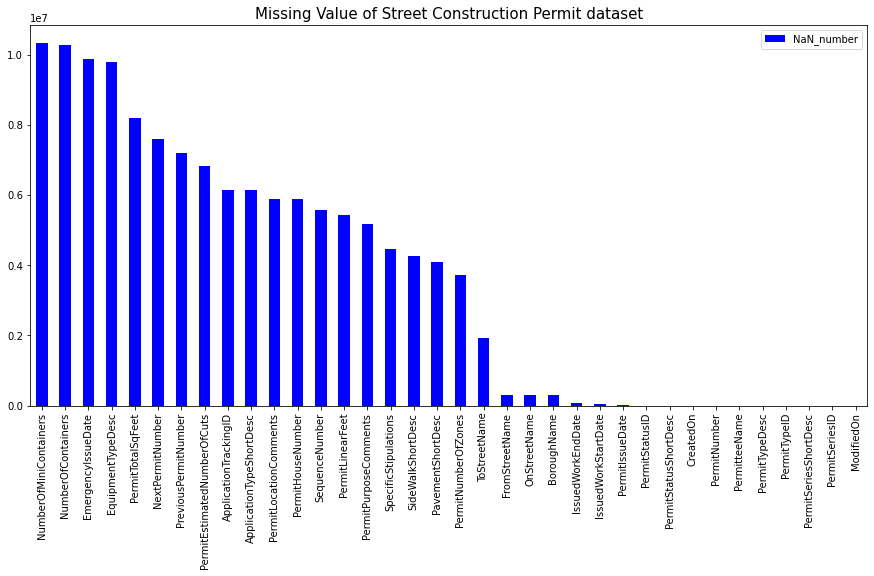

In [8]:
missing_value_permit.plot.bar(color='blue',figsize=(15,7))
plt.title('Missing Value of Street Construction Permit dataset',fontsize=15)
plt.legend()
plt.show()